# Diseño Filtros FIR pasa bajas con el método de ventanas

## 1. Ventana Cuadrada

In [53]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy import fft

from numpy.lib.stride_tricks import sliding_window_view as slide_w

## Diseño del filtro
El diseño está basado en la frecuencia normalizada 0-0.5
$$h[n] =  b[n] = \dfrac{sin(2\pi f_t n)}{\pi n}$$
$$f_t = \dfrac{f_c}{sr}$$

Implementación
$$  
b[n] = 
     \begin{cases}
        \dfrac{sin\left(2\pi f_t(n - \lceil\frac{N}{2}\rceil)\right)}{\pi (n - \lceil\frac{N}{2}\rceil)} & n\neq\lceil\dfrac{N}{2}\rceil\\
       2f_t & n = \lceil\dfrac{N}{2}\rceil\\
     \end{cases}
$$

N: orden del filtro

M: numero de muestras, N + 1

### Definición de funciones

In [54]:
def firdesign(N, fc, sr, ftype='low', info=False):
    ft = fc/sr
    M  = N + 1 
    tk = np.arange(M) - M//2
    #
    tk[M//2] = -1
    #
    sinc      = np.sin(2*np.pi * ft*tk)/(np.pi*tk)
    sinc[M//2] = 2*ft
    tk[M//2]   = 0
    #
    if info:
        print(tk, M)
        plt.figure(figsize=(12, 4))
        plt.plot(ft*tk, sinc, '-o', markersize=9, linewidth=3)
        plt.grid(True)
        #
        plt.show()
    return sinc

In [55]:
def freq_hz(S, sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0, sr/2, H.shape[0] )
    #
    return w, W, H

### Inicialización de parámetros
Orden N, Longitud M, Frecuencia de corte fc, y Frecuencia de muestreo sr

In [56]:
N  = 51
M  = N + 1
fc = 45
sr = 512

### Calcular coeficientes del filtro

[-26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25] 52


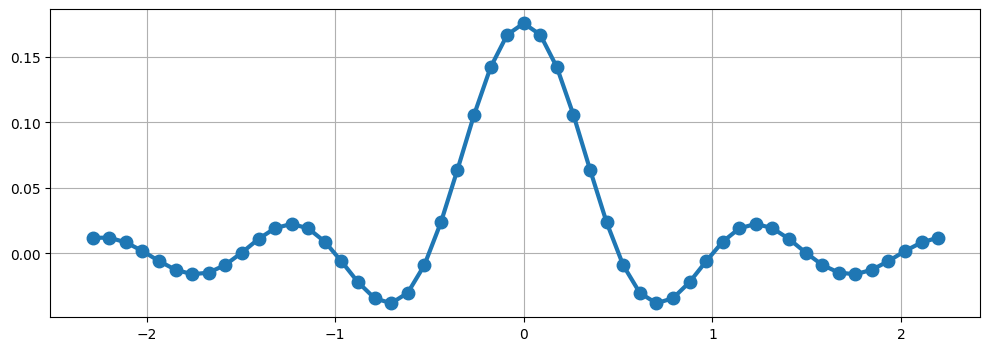

[ 0.01194522  0.01203985  0.0084139   0.00186254 -0.00586329 -0.01249881
 -0.01589632 -0.01467694 -0.00871635  0.00068918  0.01105272  0.01929314
  0.02256543  0.01911664  0.00893628 -0.00599324 -0.02194876 -0.0341998
 -0.03807545 -0.03012193 -0.00906981  0.02363879  0.06391722  0.10571205
  0.14216106  0.16698208  0.17578125  0.16698208  0.14216106  0.10571205
  0.06391722  0.02363879 -0.00906981 -0.03012193 -0.03807545 -0.0341998
 -0.02194876 -0.00599324  0.00893628  0.01911664  0.02256543  0.01929314
  0.01105272  0.00068918 -0.00871635 -0.01467694 -0.01589632 -0.01249881
 -0.00586329  0.00186254  0.0084139   0.01203985]


In [57]:
c_fir = firdesign(N, fc, sr, info=True)
print(c_fir)

### Respuesta en frecuencia del filtro

In [58]:
def resp_fir(bk, sr, color='blue'):
    w, w_hz, h_hz = freq_hz(bk, sr)
    #
    plt.figure('Magnitud', figsize=(12, 4))
    plt.title('Magnitud [dB]')
    plt.grid(True)
    plt.plot(w, h_hz, linewidth=3, color=color)
    #
    plt.figure('Fase', figsize=(12, 4))
    plt.title('Fase [grados]')
    plt.plot(w, w_hz, linewidth=3, color=color)
    plt.grid(True)
    #

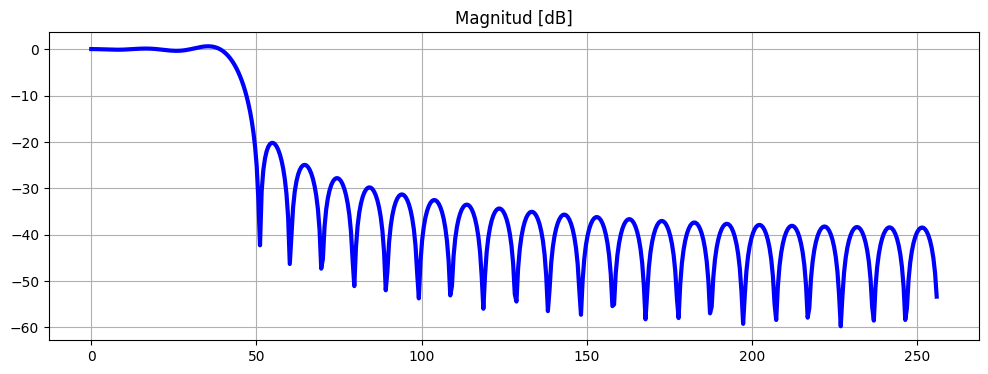

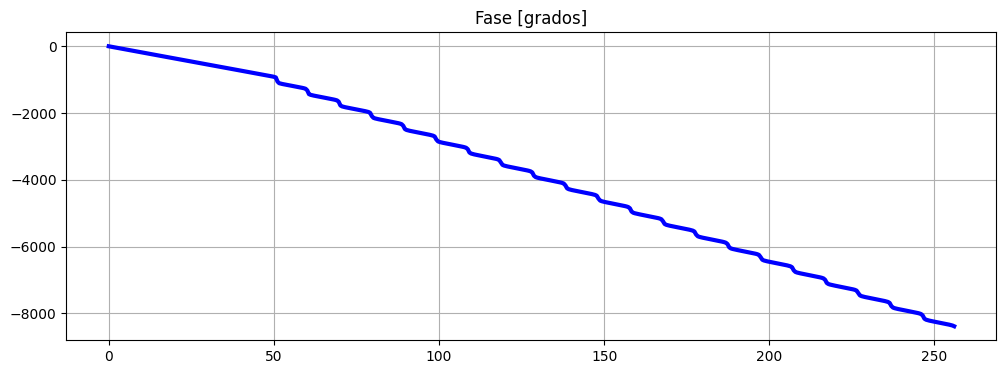

In [59]:
resp_fir(c_fir, sr)
plt.show()

**Ejemplo**

Mezcla de dos senoidales

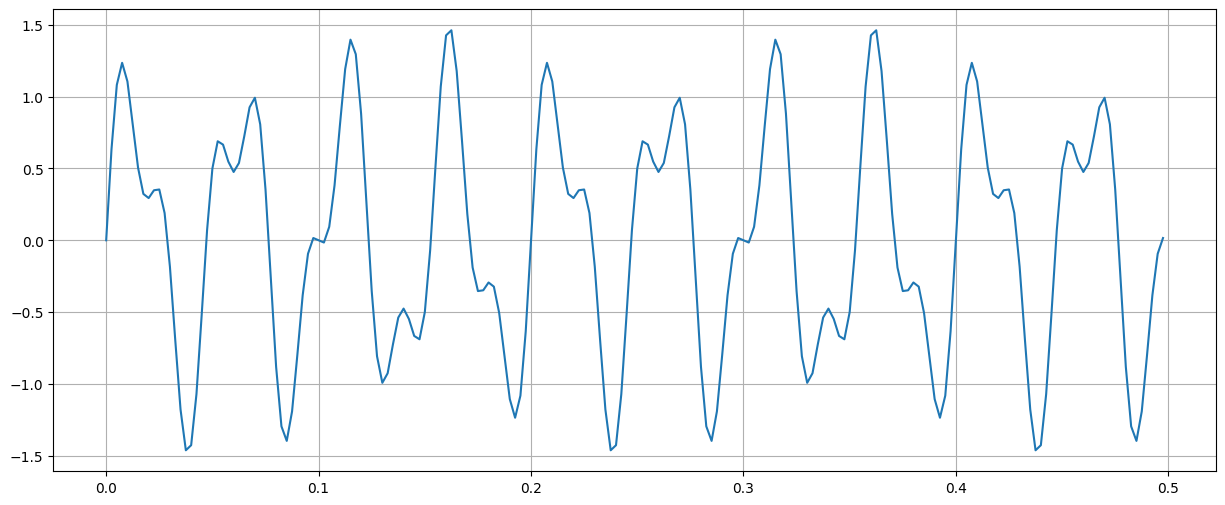

In [60]:
sr = 400
L  = 2
tau = 2*np.pi
#
t = np.arange(sr*L)/sr
y = np.sin(tau * 20*t) + 0.5*np.sin(tau * 45*t)
#
T = 0.5
lim = slice(0, int(T*sr))
#
plt.figure(figsize=(15, 6))
plt.plot(t[lim], y[lim])
plt.grid(True)
plt.show()

[-25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8
  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10
  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25] 51


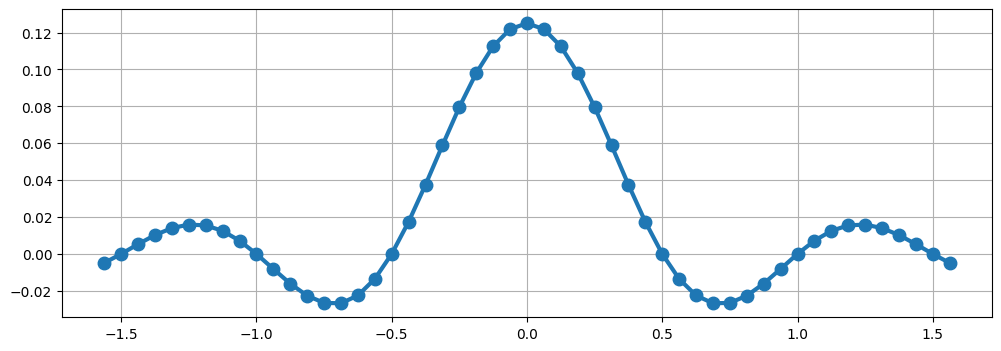

In [61]:
N  = 50
M  = N + 1
fc = 25
bn = firdesign(N, fc, sr, info=True)

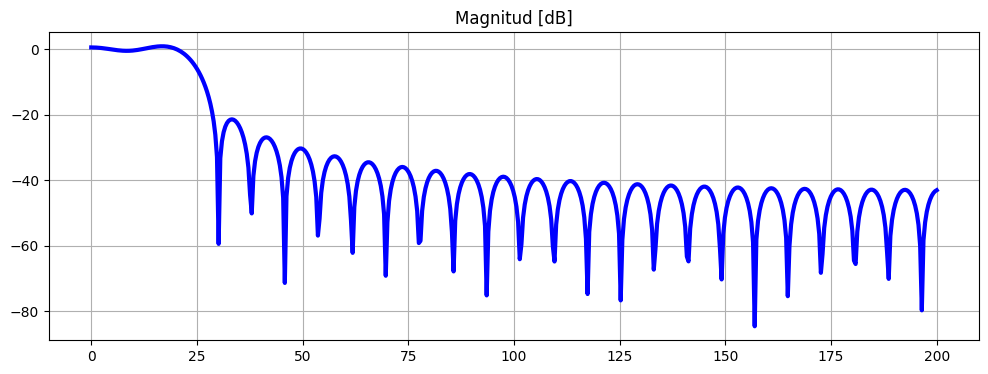

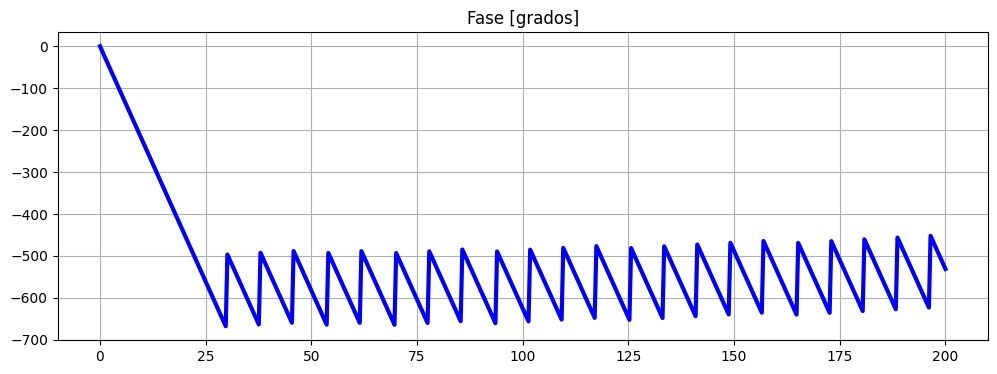

In [62]:
resp_fir(bn, sr)

In [63]:
y_f = signal.lfilter(bn, [1], y)

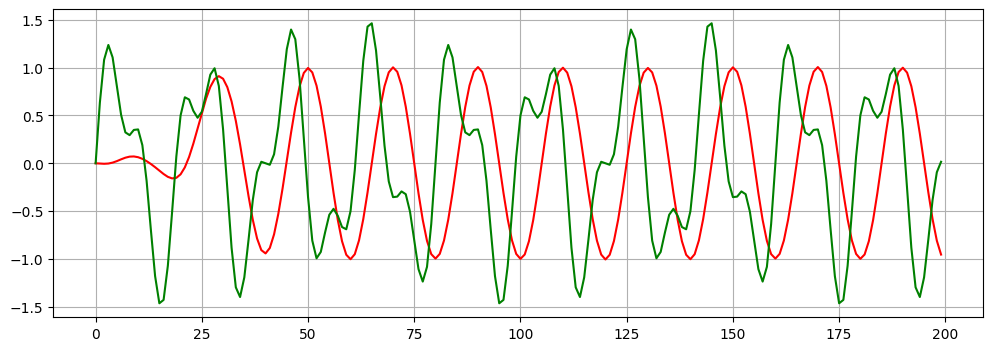

In [64]:
plt.figure(figsize=(12, 4))
plt.plot(y_f[lim], 'r')
plt.plot(y  [lim], 'g')
plt.grid(True)
plt.show()

## Convolución como producto matricial

In [65]:
xs = y.shape[0]
extra = int(np.ceil(xs/M))
zeros = np.zeros(M//2)
#
y_ext = np.concatenate((zeros, y, zeros))
y_ext

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.33741019e-01,  1.08162942e+00,
        1.23533708e+00,  1.10556501e+00,  8.08658284e-01,  5.05553254e-01,
        3.22832034e-01,  2.93892626e-01,  3.48246542e-01,  3.53553391e-01,
        1.89441672e-01, -1.83276755e-01, -6.92294312e-01, -1.17805177e+00,
       -1.46193977e+00, -1.42658477e+00, -1.07026628e+00, -5.09568020e-01,
        7.11859884e-02,  5.00000000e-01,  6.89219977e-01,  6.66002485e-01,
        5.47767712e-01,  4.75528258e-01,  5.38060234e-01,  7.24061266e-01,
        9.25739676e-01,  

In [66]:
y_wrap = slide_w(y_ext, M)
y_wrap.round(3)

array([[ 0.   ,  0.   ,  0.   , ...,  0.548,  0.476,  0.538],
       [ 0.   ,  0.   ,  0.   , ...,  0.476,  0.538,  0.724],
       [ 0.   ,  0.   ,  0.   , ...,  0.538,  0.724,  0.926],
       ...,
       [-0.992, -0.926, -0.724, ...,  0.   ,  0.   ,  0.   ],
       [-0.926, -0.724, -0.538, ...,  0.   ,  0.   ,  0.   ],
       [-0.724, -0.538, -0.476, ...,  0.   ,  0.   ,  0.   ]])

In [67]:
y_filt = (y_wrap @ bn)

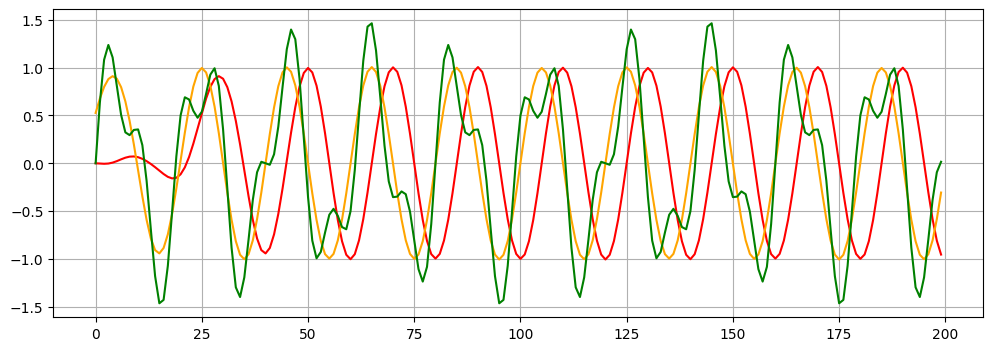

In [68]:
plt.figure(figsize=(12, 4))
plt.plot(y_f   [lim], 'r')
plt.plot(y_filt[lim], color='orange')
plt.plot(y     [lim], 'g')
plt.grid(True)
plt.show()

## Procedimiento de Fitrado

### 1. Análisis de la Señal

In [69]:
path = "/home/omarpr/Descargas/"
fname = "ECG.csv"
#
ecg = np.genfromtxt(path + fname, dtype=float, delimiter=',', names=True)

In [70]:
t, ecg = ecg['Tiempos'], ecg['CH1V']

In [71]:
L = 2 #segundos
sr = 1/np.diff(t[0: 2])[0]
lim = slice(0, int(L*sr))

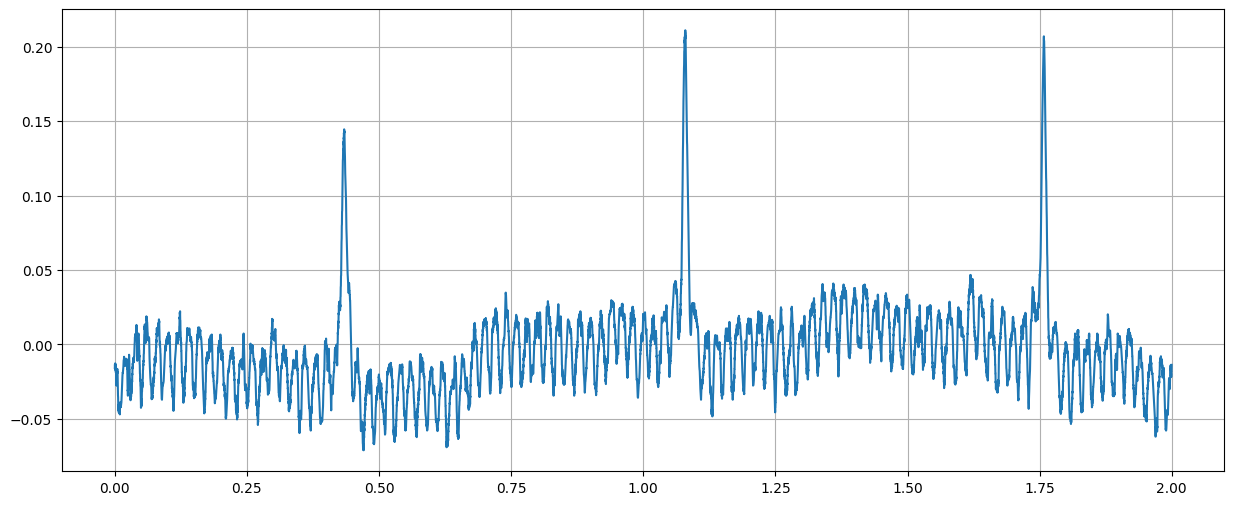

In [72]:
plt.figure(figsize=(15, 6))
plt.plot(t[lim], ecg[lim])
plt.grid(True)
plt.show()

In [73]:
def spectrum(x, sr, color='blue'):
    X = fft.fft(x)
    L = X.shape[0]//2
    X = X[:L]
    F = np.linspace(0, sr/2, L)
    #
    X_db = 20*np.log10(np.abs(X))
    #
    # Plot
    plt.figure('Spectrum', figsize=(15, 6))
    plt.plot(F, X_db, color=color)
    plt.grid(True)

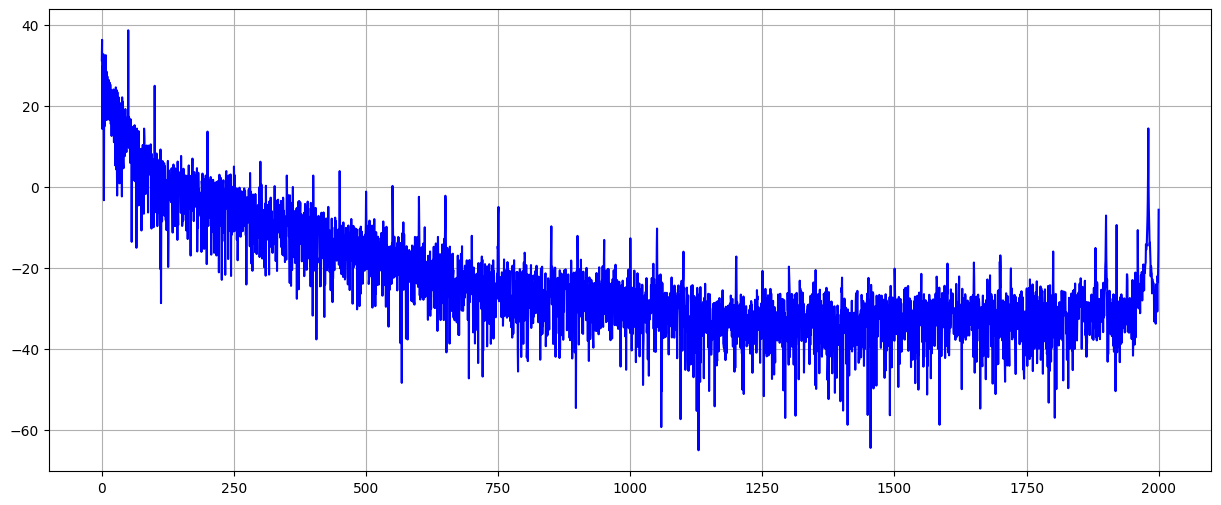

In [74]:
spectrum(ecg, sr)
plt.show()

In [75]:
N = 799
bn = firdesign(N, 40, sr)
#
ecg_filt = signal.lfilter(bn, [1], ecg)

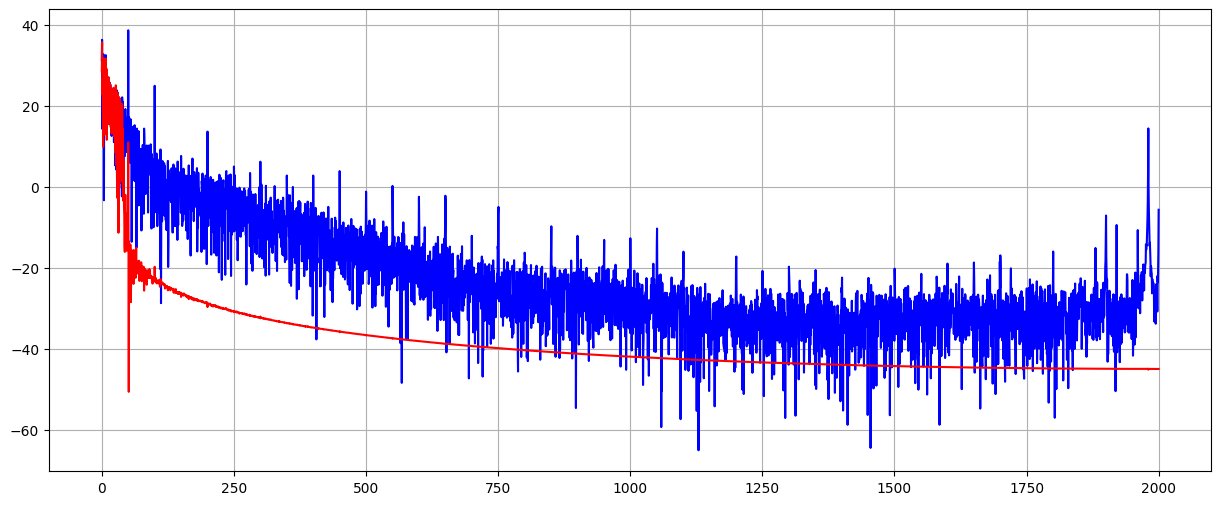

In [76]:
spectrum(ecg, sr)
spectrum(ecg_filt, sr, color='red')
plt.show()

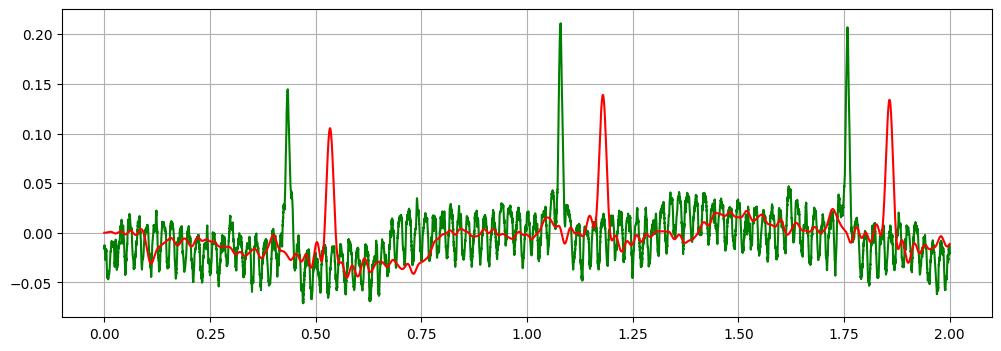

In [77]:
plt.figure(figsize=(12, 4))
plt.plot(t[lim], ecg     [lim], 'g')
plt.plot(t[lim], ecg_filt[lim], 'r')
plt.grid(True)
plt.show()

In [78]:
ecg_filtfilt = signal.lfilter(bn, [1], ecg_filt[::-1])[::-1]

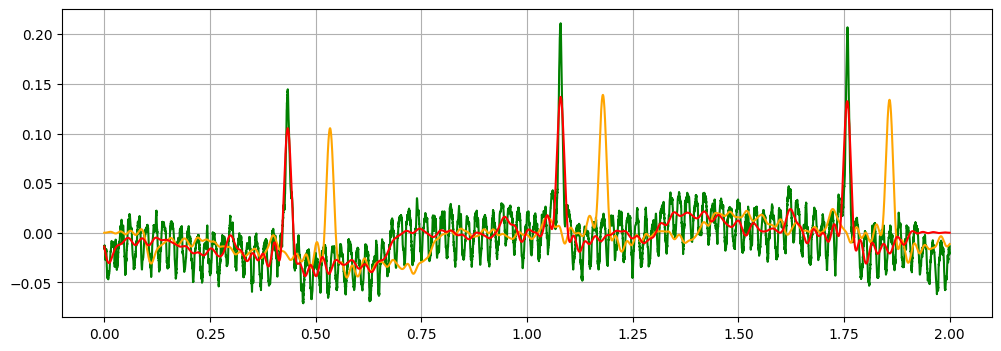

In [79]:
plt.figure(figsize=(12, 4))
plt.plot(t[lim], ecg         [lim], 'g')
plt.plot(t[lim], ecg_filt    [lim], color='orange')
plt.plot(t[lim], ecg_filtfilt[lim], 'r')
plt.grid(True)
plt.show()

## Diseño con ventanas no cuadradas

### Ventana de Hamming
$$W[t_k]= 0.54 - 0.46 cos\left(\dfrac{2\pi t_k}{M}\right)$$

In [84]:
def hamm(N):
    M  = N + 1
    tk = np.arange(M)
    wn =  .54 - .46*np.cos(2*np.pi * tk/M)
    return wn

In [85]:
N  = 50
fc = 25
sr = 220
bn = firdesign(N, fc, sr, info=False)
w_hamm = hamm(N)

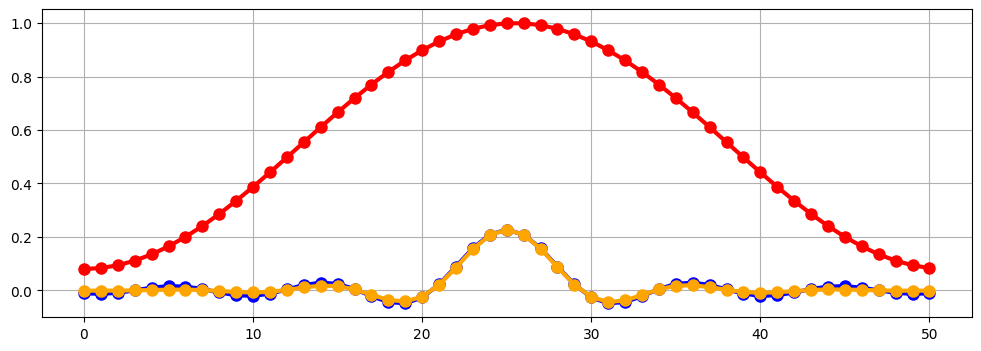

In [87]:
plt.figure(figsize=(12, 4))
plt.plot(bn         , '-bo', linewidth=3, markersize=8)
plt.plot(w_hamm     , '-ro', linewidth=3, markersize=8)
plt.plot(bn * w_hamm, '-o' , linewidth=3, markersize=8, color='orange')
plt.grid(True)
plt.show()

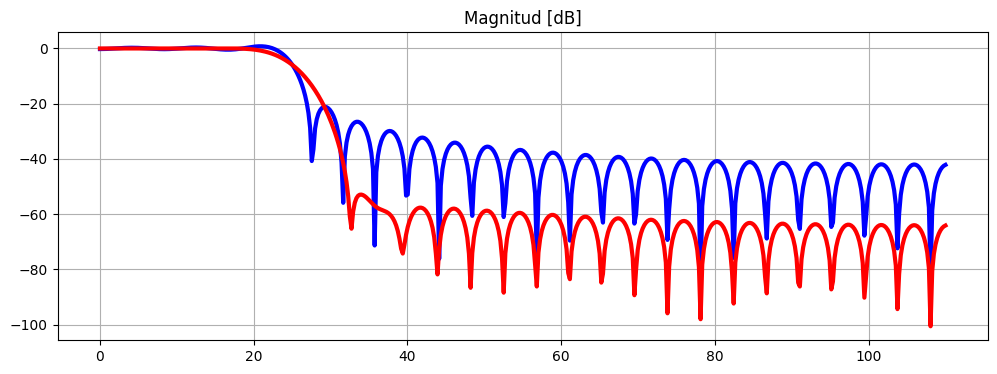

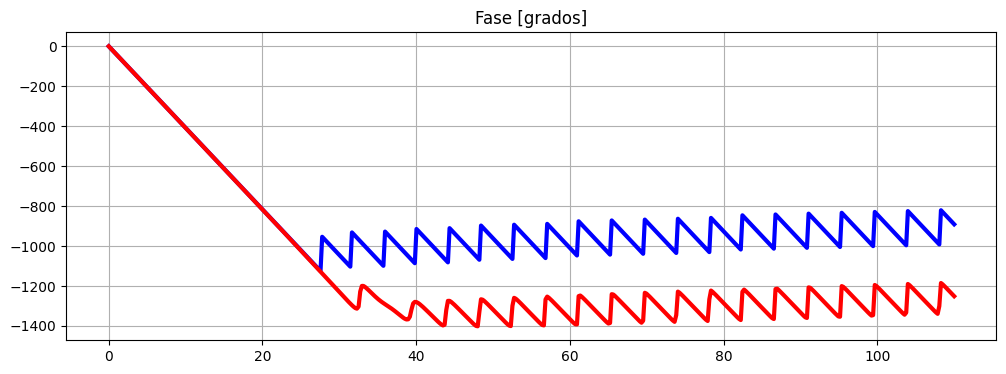

In [88]:
bn_w = bn * w_hamm
resp_fir(bn    , sr, color='blue')
resp_fir(bn_w  , sr, color='red')
#resp_fir(w_hamm, sr, color='orange')